In [3]:
import argparse
# from core.base_dataset import BaseDataset
# from models.metric import inception_score
import glob
import numpy as np
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tabulate import tabulate

In [11]:
dst = r"..\repos\Palette\experiments\test_ppg2abp_1DBP_v8_240126_152118\results\test\0"
src = r"..\data\processed\BP_npy\0123_08_align_norm3_256\p00\scale_test.npy"

In [13]:
def calc_min_max(x):
    # x = (x.astype(np.float32)/127.5-1)
    return np.nanmin(x,axis=1),np.nanmax(x,axis=1)
def create_plots(x,y):
    n=4
    x *= 200
    y *= 200
    fig,axes = plt.subplots(2,n,figsize=(10,5),tight_layout=True)
    for i in range(n):
        axes[0,i].plot(x[i,:])
        axes[1,i].plot(y[i,:])
    plt.show()
    plt.close()
    

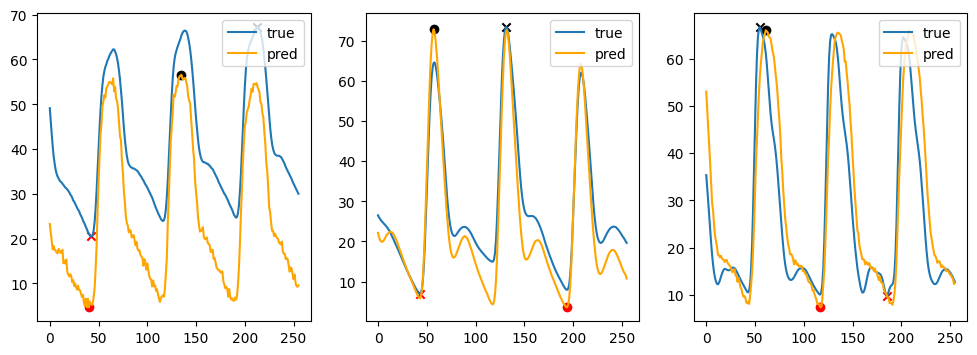

In [61]:
n_patients = 0
errors = []
gt = []
cond= []
out = []
scales = np.load(src)
print("aaaa",scales.shape,scales[:10])
# for i in p0n_dir:
gt_files = glob.glob(f"{dst}\GT_*.npy")
cond_files = glob.glob(f"{dst}\Process_*.npy")
out_files = glob.glob(f"{dst}\OUT_*.npy")
for j in tqdm(range(len(gt_files))):
    # output = np.load(os.path.join(file,args.dst))
    gt.append(np.load(os.path.join(gt_files[j])))
    # plt.plot(gt[0,:])
    # plt.show()
    cond.append(np.load(os.path.join(cond_files[j])))
    out.append(np.load(os.path.join(out_files[j])))
    # print(gt.shape,out.shape,gt.dtype)
    # calc min and max"
    if j % 50 == 0:
        # create_plots(gt,out)
        pass
print(gt[-1].shape)
out = np.concatenate(out,axis=0)
gt = np.concatenate(gt,axis=0)
scales = scales[:out.shape[0]]
gt[:] /= scales[:,1][:, None]
gt[:] -= scales[:,0][:, None]
out[:] /= scales[:,1][:, None]
out[:] -= scales[:,0][:, None]
cond = np.concatenate(cond,axis=0)
gt_mean = np.mean(gt.flatten())
out_mean = np.mean(out.flatten())
cond_mean = np.mean(cond.flatten())
gt_std = np.std(gt.mean(axis=1),dtype=np.float64)
out_std = np.std(out.mean(axis=1),dtype=np.float64)
cond_std = np.std(cond.mean(axis=1),dtype=np.float64)
print(np.count_nonzero(np.isnan(out)))
headers = ["Signal", "Mean","Std"]
table = [["data_ppg", 0.494153162946643,0.10694360087091538],
        ]
table.append(["cond_ppg",cond_mean,cond_std])
table.append( ["data_abp",0.39593121533751857,0.13489903083932583])
table.append(["gt",gt_mean,gt_std])
table.append(["out",out_mean,out_std])
print(tabulate(table,headers, floatfmt=".4f"))
# print(gt_mean,gt_std,out_mean,out_std,cond_mean,cond_std)
# print(gt.shape,out.shape)
# out = (out-out_mean)/out_std*0.1349+0.396
# out = (out-out_mean)/out_std*gt_std+gt_mean
gt_min,gt_max = calc_min_max(gt)
gt_argmin,gt_argmax = np.argmin(gt,axis=1),np.argmax(gt,axis=1)
out_min,out_max = calc_min_max(out)
out_argmin,out_argmax = np.argmin(out,axis=1),np.argmax(out,axis=1)
# print(out_max.shape,out_max[:10])
errors = np.zeros((2,*out_min.shape))
# print(error.shape)
errors[0,:]=gt_min-out_min
errors[1,:]=gt_max-out_max

aaaa (22737, 2) [[-0.90958691  0.01595737]
 [-0.90958691  0.01595737]
 [-0.874034    0.01582172]
 [-0.874034    0.01582172]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]]


100%|██████████| 46/46 [00:00<00:00, 1459.75it/s]

(500, 256)


0
Signal       Mean     Std
--------  -------  ------
data_ppg   0.4942  0.1069
cond_ppg   0.3257  0.3348
data_abp   0.3959  0.1349
gt        30.9844  8.7257
out       31.0312  9.1451


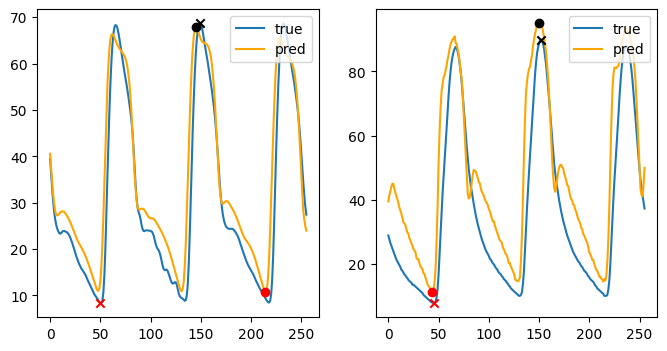

In [138]:
i = np.random.randint(2000)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.legend(loc='upper right')
i = np.random.randint(20000)
plt.subplot(122)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
plt.legend(loc='upper right')
plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
i = np.random.randint(10000)
# plt.subplot(133)
# plt.plot(gt[i],label='true')
# plt.plot(out[i],c='orange',label='pred')
# plt.legend(loc='upper right')
# plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
# plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
# plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
# plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)